# Example of likelihood

In [1]:
import os

import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

import appletree as apt
from appletree.utils import get_file_path

Using Normal as an approximation of Binomial
Using aptext package from https://github.com/XENONnT/applefiles


In [2]:
apt.set_gpu_memory_usage(0.2)

## Likelihood configuration

In [3]:
config = dict(
    data_file_name=get_file_path("data_Rn220.csv"),
    bins_type="equiprob",
    bins_on=["cs1", "cs2"],
    bins=[15, 15],
    x_clip=[0, 100],
    y_clip=[2e2, 1e4],
)

llh = apt.Likelihood(**config)

## Register components

In [4]:
# Register components
llh.register_component(apt.ERBand, "rn220_er")
llh.register_component(apt.AC, "rn220_ac", file_name="AC_Rn220.pkl")

# To see all the components
llh.print_likelihood_summary(short=True)


----------------------------------------
BINNING

    bins_type: equiprob
    bins_on: ['cs1', 'cs2']

----------------------------------------
DATA

    file_name: /home/xudc/appletree/appletree/data/data_Rn220.csv
    data_rate: 2000.0

----------------------------------------
MODEL

    COMPONENT 0: rn220_er
        type: simulation
        rate_par: rn220_er_rate
        pars: {'py1', 'rf1', 'drift_velocity', 'p_dpe', 'rf0', 'py4', 'py0', 'nex_ni_ratio', 'g2', 'g1', 's2_cut_acc_sigma', 'w', 's1_cut_acc_sigma', 's2_threshold', 's1_eff_3f_sigma', 'field', 'rn220_er_rate', 'py2', 'gas_gain', 'fano', 'py3', 'elife_sigma'}

    COMPONENT 1: rn220_ac
        type: fixed
        file_name: AC_Rn220.pkl
        rate_par: rn220_ac_rate
        pars: {'rn220_ac_rate'}

----------------------------------------


## Load parameters

In [5]:
# Load parameters(and their priors) in simulation. Note: these parameters will be shared among components

par_manager = apt.Parameter(get_file_path("er.json"))

par_manager.sample_init()

parameters = par_manager.get_all_parameter()

# Have to specify the normalization factor of each component
parameters["rn220_ac_rate"] = parameters["ac_rate"]
parameters["rn220_er_rate"] = parameters["er_rate"]

In [6]:
parameters

{'w': 0.014274272336585105,
 'fano': 0.059,
 'gas_gain': 31.3,
 'drift_velocity': 0.0677,
 's2_threshold': 500.0,
 'field': 23.0,
 'nex_ni_ratio': 0.10151185848273721,
 'g1': 0.15351120578938598,
 'g2': 16.44133119465396,
 'p_dpe': 0.22178487445536998,
 'elife_sigma': -0.008225975273542147,
 's1_eff_3f_sigma': 0.26542639778743793,
 's1_cut_acc_sigma': 0.13441954291258612,
 's2_cut_acc_sigma': 0.9857380490961171,
 'py0': 0.09164779636874743,
 'py1': 43.42783454398944,
 'py2': -0.2609731511199965,
 'py3': 0.8929235275852672,
 'py4': 0.669344602200388,
 'rf0': 0.024649716781456686,
 'rf1': 0.1436405417797817,
 'ac_rate': 8.781138062834259,
 'er_rate': 1988.3417164358577,
 'rn220_ac_rate': 8.781138062834259,
 'rn220_er_rate': 1988.3417164358577}

## Generate histogram under parameters

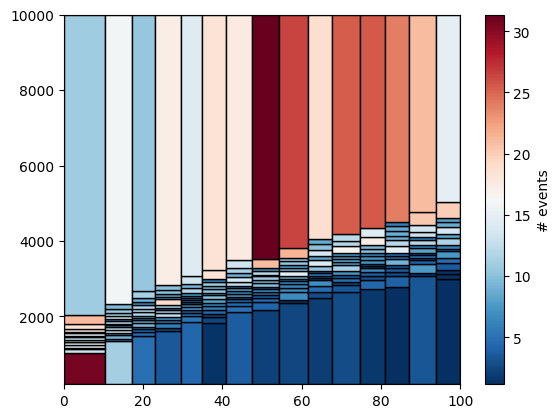

In [7]:
key = apt.get_key()

key, hist = llh._simulate_model_hist(key, int(1e6), parameters)
apt.plot_irreg_histogram_2d(*llh._bins, hist)
plt.show()

key, log_llh = llh.get_log_likelihood(key, int(1e6), parameters)

In [8]:
print(f"The log (posterior) LLH is {log_llh:.2f} now.")

The log (posterior) LLH is 1978.69 now.
